# librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import missingno as msno


df = pd.read_csv("csv.csv")

# exploracion

In [ ]:
rename = {'Digite su promedio ponderado (de toda la carrera)': 'promedio',
          '¿Cuántas horas por semana dedicas a estudiar fuera de clase al día? (Horas de trabajo independiente en un día libre)': 'estudio_indepe',
          '¿Cómo describirías tus habilidades para trabajar en equipo?': 'teamwork',
          '¿Qué tan seguido estudias con tus compañeros de clase fuera del horario escolar?': 'estudio_equipo',
          'En términos generales, ¿cómo describirías tu participación en clase?': 'participacion_clase',
          '¿Qué tan motivado/a te sientes para seguir estudiando y alcanzar tus metas profesionales?': 'motivacion'}

df.rename(rename, axis=1, inplace=True)

In [ ]:
df = df.replace(['Menos de un semestre','1 semestre','2 semestres','3 semestres','Mas de 3 semestres','Desde antes de entrar a la UIS'],[0,10,20,30,40,50])
df = df.replace(['No lo conozco','Lo conozco pero no hablamos','Hablamos solo temas de estudio','Hablamos habitualmente','Somos amigos','Somos muy amigos (panitas)','Soy yo'],[1,2,3,4,5,6,7])
df = df.replace(['Moderadamente motivado/a: Tengo algún interés en mi carrera, pero no estoy seguro/a de mis metas a largo plazo.','Muy motivado/a: Estoy muy interesado/a en mi carrera y tengo claras mis metas profesionales a largo plazo.'],[1,2])
df = df.replace(['No participo.','Muy poco.','De vez en cuando.','Activa, si puedo aportar algo no dudo en decirlo.'],[1,2,3,4])
df = df.replace(['Normalmente no estudio en grupo.','Nos reunimos muy pocas veces por semestre.','Nos reunimos cuando hay exámenes importantes.','Nos reunimos muy seguido, casi todas las semanas.'],[1,2,3,4])
df = df.replace(['Pobre: No me siento cómodo trabajando con otros y tengo dificultades para colaborar efectivamente con ellos.','Regular: No tengo mucha experiencia trabajando en equipo y prefiero trabajar solo.','Buena: Tengo alguna experiencia trabajando en equipo, pero a veces tengo dificultades para resolver conflictos o tomar decisiones en grupo','Excelente: Me siento cómodo trabajando con otros y puedo colaborar efectivamente con ellos para alcanzar objetivos comunes.'],[1,2,3,4])
df = df.replace(['No estudio fuera de clase.','Menos de una hora.','Entre una y tres horas.','Entre 4 y 6 horas.','Más de 6 horas.'],[0,1,2,3,4])

# feature engineering

In [ ]:
data = {}
for col in [col for col in df if col.startswith('Person')]:
  data[col] = df[col].value_counts()

In [ ]:
friends = np.zeros(23)

for i in range(24):
  for k in range(4,7):
    try:
      friends[i] += data[f'Person_{i+1}'][k]
    except Exception as e:
      continue

In [ ]:
df['friends'] = friends.tolist()

# graficos

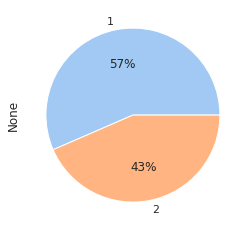

In [ ]:
colors = sns.color_palette('pastel')[0:5]
df.groupby('motivacion').size().plot(kind='pie', colors = colors, autopct='%.0f%%')

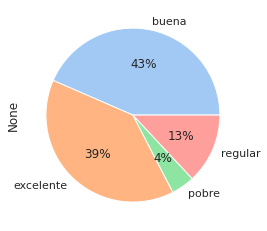

In [ ]:
df['teamwork'] = df['teamwork'].replace([1,2,3,4],['pobre','regular','buena','excelente'])
colors = sns.color_palette('pastel')[0:5]
df.groupby('teamwork').size().plot(kind='pie', colors = colors, autopct='%.0f%%')
df['teamwork'] = df['teamwork'].replace(['pobre','regular','buena','excelente'],[1,2,3,4])

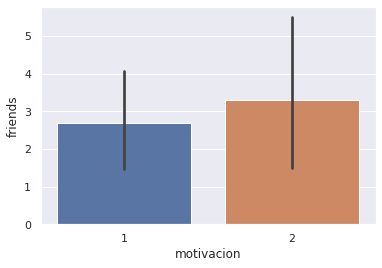

In [ ]:
sns.barplot(x='motivacion', y='friends', data=df) 

# outliers

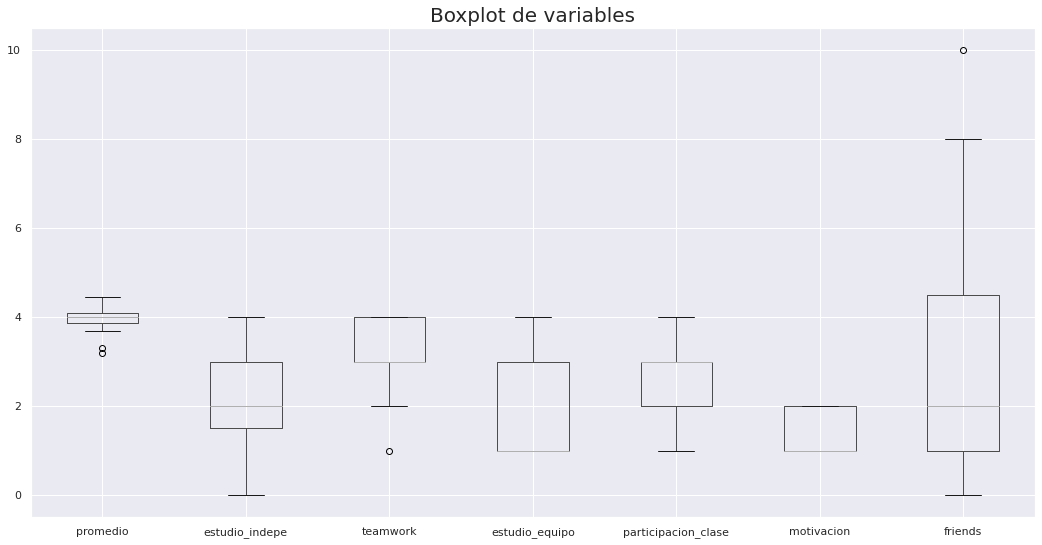

In [ ]:
num_cols = ['promedio','estudio_indepe','teamwork','estudio_equipo','participacion_clase','motivacion','friends']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Boxplot de variables", fontsize=20)
plt.show()

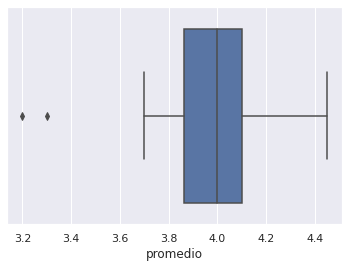

In [ ]:
sns.set_style("darkgrid")
sns.boxplot(x=df["promedio"])

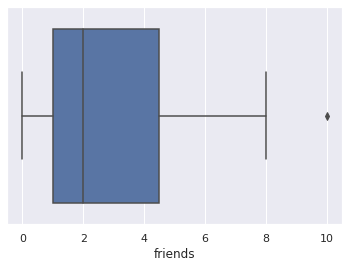

In [ ]:
sns.set_style("darkgrid")
sns.boxplot(x=df["friends"])

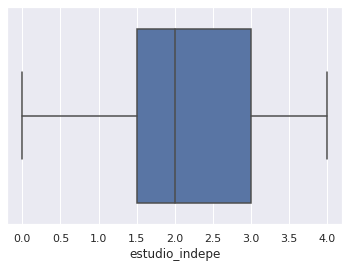

In [ ]:
sns.set_style("darkgrid")
sns.boxplot(x=df["estudio_indepe"])

# Resultados

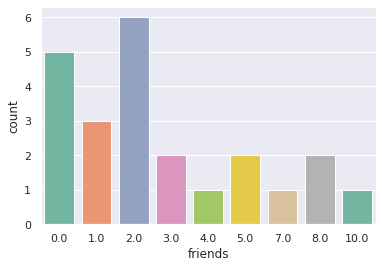

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x=df['friends'], palette = "Set2")

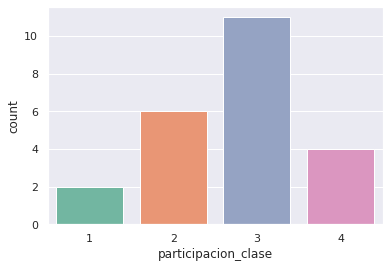

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x=df['participacion_clase'], palette = "Set2")

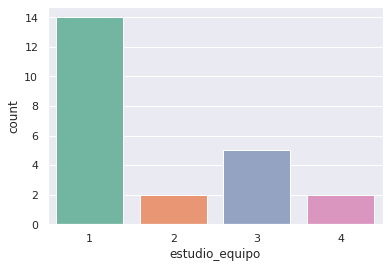

In [ ]:
sns.set_style("darkgrid")
sns.countplot(x=df['estudio_equipo'], palette = "Set2")

3.9530434782608697 0.2781666404188274


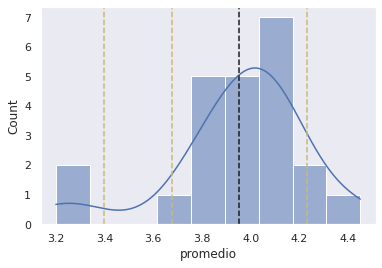

In [ ]:

m = statistics.mean(df['promedio'])
sd = statistics.stdev(df['promedio'])
sns.set_style("dark")
sns.histplot(df['promedio'],bins=9, kde=True);

plt.axvline(m,color='k', linestyle='dashed')

plt.axvline(m + sd, color='y',linestyle='dashed')
plt.axvline(m - sd, color='y',linestyle='dashed')

plt.axvline(m - 2*sd, color='y',linestyle='dashed')

print(m,sd)

In [ ]:
cols = [col for col in df if (not col.startswith('Person')) and (not col.startswith('Hace cuanto'))]

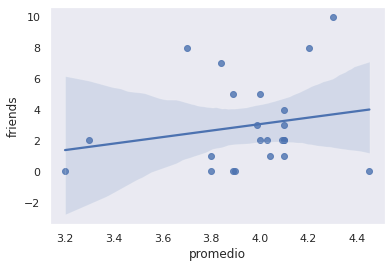

In [ ]:
sns.set_style("dark")
sns.regplot(data=df,x="promedio",y="friends")

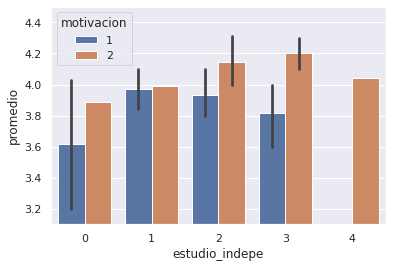

In [ ]:

#create grouped bar chart
plt.ylim(3.1, 4.5)
sns.set_style("darkgrid")
sns.barplot(x='estudio_indepe', y='promedio', hue='motivacion', data=df) 

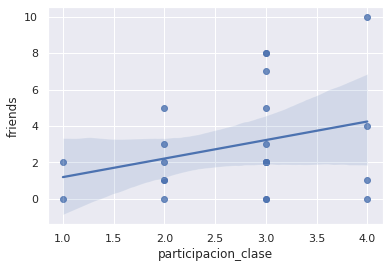

In [ ]:
sns.set_style("darkgrid")
sns.regplot(data=df,x="participacion_clase",y="friends")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

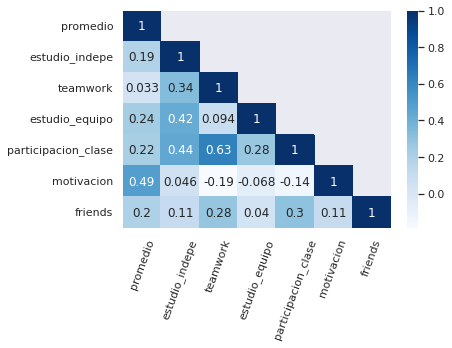

In [ ]:
#msno.heatmap(df[cols])
corr = df[cols].corr()

mask = np.triu(np.ones_like(df[cols].corr()))  - np.eye(7)

sns.heatmap(corr, cmap="Blues", annot=True,mask=mask)
plt.xticks(rotation=70) 

In [ ]:
df.describe()

,Person_1,Hace cuanto lo/la conoce: (1),Person_2,Hace cuanto lo/la conoce: (2),Person_3,Hace cuanto lo/la conoce: (3),Person_4,Hace cuanto lo/la conoce: (4),Person_5,Hace cuanto lo/la conoce: (5),...,Person_24,Hace cuanto lo/la conoce: (24),Person_25,Hace cuanto lo/la conoce: (25),promedio,estudio_indepe,teamwork,estudio_equipo,participacion_clase,motivacion
count,23.000000,9.000000,23.000000,5.000000,23.000000,8.000000,23.000000,10.000000,23.000000,15.000000,...,23.000000,3.000000,23.000000,4.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.000000,18.888889,1.565217,4.000000,1.956522,10.000000,2.173913,24.000000,2.739130,18.666667,...,1.434783,3.333333,1.608696,20.000000,3.953043,2.000000,3.173913,1.739130,2.739130,1.478261
std,1.566699,16.914819,1.342524,5.477226,1.521909,14.142136,1.800307,17.126977,1.839402,13.020131,...,1.308229,5.773503,1.437774,14.142136,0.278167,1.087115,0.834058,1.009833,0.864312,0.510754
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,10.000000,3.200000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,10.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.000000,1.000000,10.000000,...,1.000000,0.000000,1.000000,10.000000,3.865000,1.500000,3.000000,1.000000,2.000000,1.000000
50%,1.000000,10.000000,1.000000,0.000000,1.000000,5.000000,1.000000,25.000000,2.000000,20.000000,...,1.000000,0.000000,1.000000,15.000000,4.000000,2.000000,3.000000,1.000000,3.000000,1.000000
75%,2.500000,40.000000,1.500000,10.000000,3.000000,12.500000,2.500000,40.000000,4.000000,20.000000,...,1.000000,5.000000,1.000000,25.000000,4.100000,3.000000,4.000000,3.000000,3.000000,2.000000
max,7.000000,40.000000,7.000000,10.000000,7.000000,40.000000,7.000000,40.000000,7.000000,40.000000,...,7.000000,10.000000,7.000000,40.000000,4.450000,4.000000,4.000000,4.000000,4.000000,2.000000


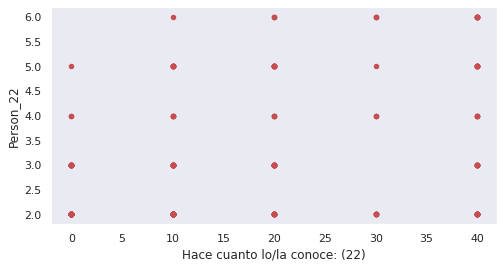

In [ ]:
sns.set_style("darkgrid")
sns.barplot(x='estudio_indepe', y='promedio', hue='motivacion', data=df) 

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for i in range(1,23):
  df.plot(kind='scatter', x=f'Hace cuanto lo/la conoce: ({i})', y=f'Person_{i}', color='r',ax=ax)  

In [ ]:
df.columns

Index(['Person_1', 'Hace cuanto lo/la conoce: (1)', 'Person_2',
       'Hace cuanto lo/la conoce: (2)', 'Person_3',
       'Hace cuanto lo/la conoce: (3)', 'Person_4',
       'Hace cuanto lo/la conoce: (4)', 'Person_5',
       'Hace cuanto lo/la conoce: (5)', 'Person_6',
       'Hace cuanto lo/la conoce: (6)', 'Person_7',
       'Hace cuanto lo/la conoce: (7)', 'Person_8',
       'Hace cuanto lo/la conoce: (8)', 'Person_9',
       'Hace cuanto lo/la conoce: (9)', 'Person_10',
       'Hace cuanto lo/la conoce: (10)', 'Person_11',
       'Hace cuanto lo/la conoce: (11)', 'Person_12',
       'Hace cuanto lo/la conoce: (12)', 'Person_13',
       'Hace cuanto lo/la conoce: (13)', 'Person_14',
       'Hace cuanto lo/la conoce: (14)', 'Person_15',
       'Hace cuanto lo/la conoce: (15)', 'Person_16',
       'Hace cuanto lo/la conoce: (16)', 'Person_17',
       'Hace cuanto lo/la conoce: (17)', 'Person_18',
       'Hace cuanto lo/la conoce: (18)', 'Person_19',
       'Hace cuanto lo/la conoce: